Analysing Covid-19 impact in INDIA

In [1]:
# !pip install openpyxl
# !pip install seaborn
#!pip install plotly
#!pip install matplotlib
#!pip install pandas


In [18]:
#importing the libraries
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
%matplotlib inline

In [19]:
#Importing the csv files
covid_df=pd.read_csv("C:/Users/girid/Desktop/Covid-19/datasets/covid_19_india.csv")
vaccine_df=pd.read_csv("C:/Users/girid/Desktop/Covid-19/datasets/covid_vaccine_statewise.csv")

In [20]:
#Droping ofcolumns
covid_df.drop(["Sno","ConfirmedIndianNational","ConfirmedForeignNational","Time"],inplace = True, axis =1)

In [21]:
#Date format
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%d-%m-%Y')

In [22]:
#Active cases
covid_df['Active cases'] = covid_df['Confirmed']-(covid_df['Cured']+covid_df['Deaths'])

In [23]:
#Creating pivot tables
state = pd.pivot_table(covid_df,values = ["Confirmed","Cured","Deaths"], index ="State/UnionTerritory", aggfunc = max)

In [24]:
#Adding new column as recovery rate
state["Recovery rate"] = state["Cured"]*100/state["Confirmed"]

In [25]:
#Adding new column as recovery rate
state["mortality rate"] = state["Deaths"]*100/state["Confirmed"]

In [26]:
#Sorting the values and changing the style
state = state.sort_values(by = "Confirmed", ascending = False)
state.style.background_gradient(cmap ="cubehelix")


,Confirmed,Cured,Deaths,Recovery rate,mortality rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


Text(0, 0.5, 'Active cases')

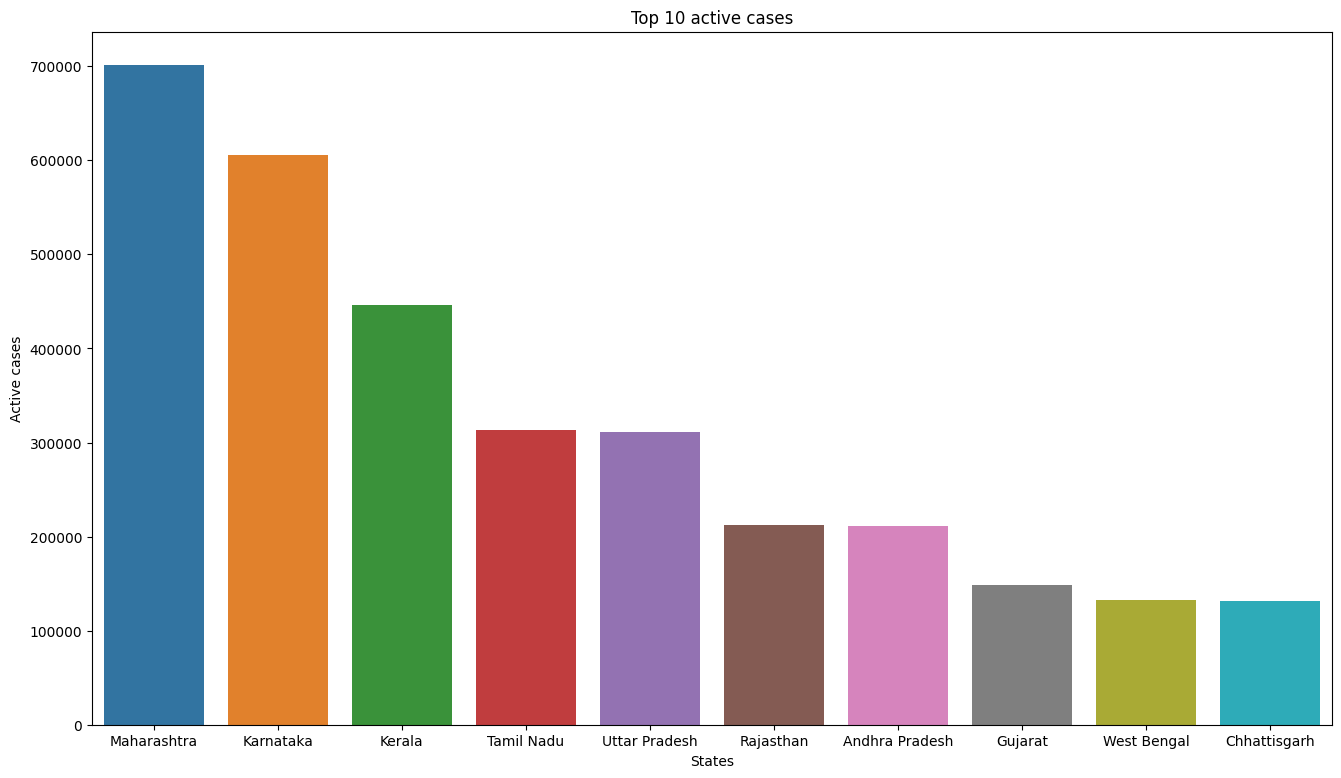

In [27]:
#Top 10 Covid-19 cases
top_10=covid_df.groupby(by ="State/UnionTerritory").max()[["Active cases","Date"]].sort_values(by =["Active cases"], ascending = False).reset_index()
fig= plt.figure(figsize=(16,9))
plt.title("Top 10 active cases")
ax=sns.barplot(data = top_10.iloc[:10], x ="State/UnionTerritory", y ="Active cases")
plt.xlabel("States")
plt.ylabel("Active cases")

Text(0, 0.5, 'Death cases')

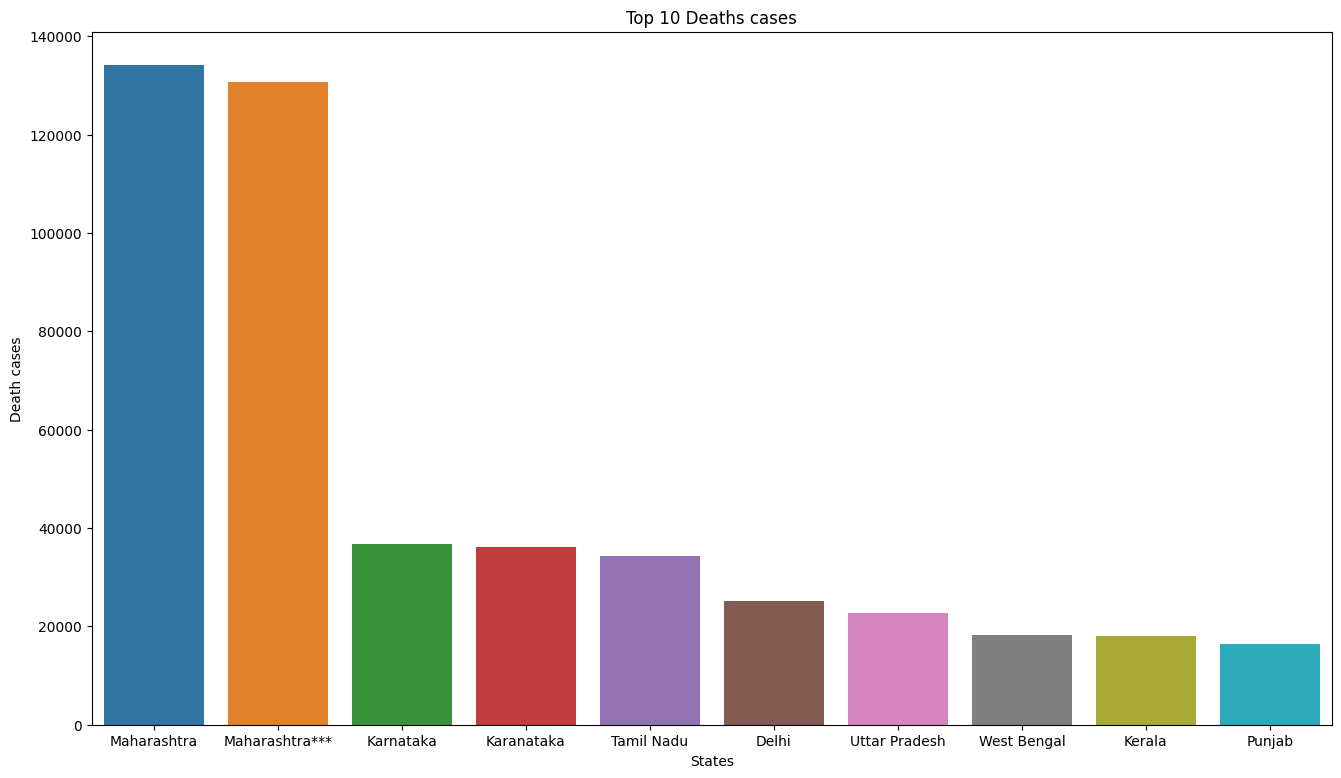

In [28]:
#Top 10 Covid-19 deaths
top_10_death=covid_df.groupby(by ="State/UnionTerritory").max()[["Deaths","Date"]].sort_values(by =["Deaths"], ascending = False).reset_index()
fig= plt.figure(figsize=(16,9))
plt.title("Top 10 Deaths cases")
ax=sns.barplot(data = top_10_death.iloc[:10], x ="State/UnionTerritory", y ="Deaths", linewidth = 2)
plt.xlabel("States")
plt.ylabel("Death cases")

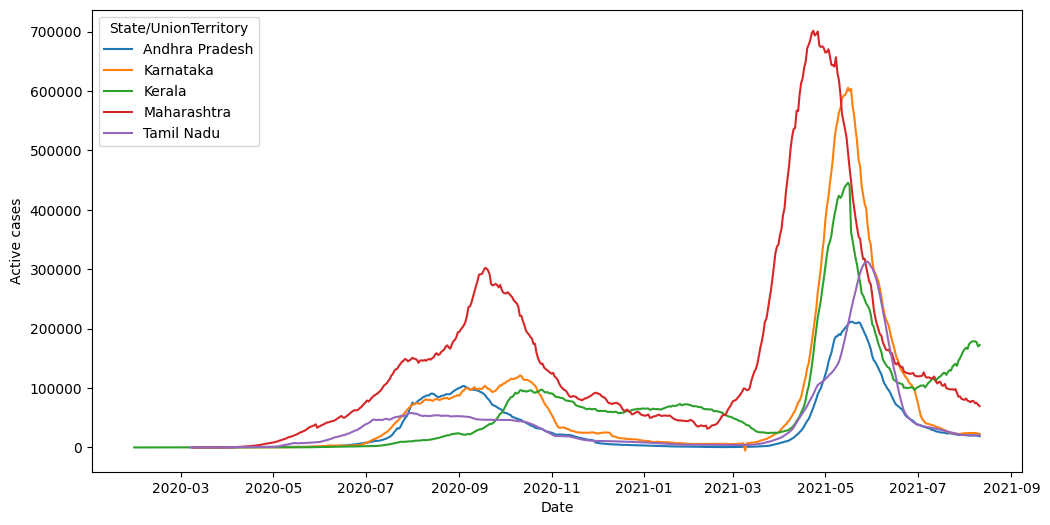

In [29]:
#Date Vs Active Covid-19 cases
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(data= covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Kerala','Karnataka','Tamil Nadu','Andhra Pradesh'])],x = 'Date', y = 'Active cases', hue = 'State/UnionTerritory')

In [30]:
#Renaming the column name
vaccine_df.rename(columns = {'Updated On':'Vaccine Date'},inplace = True)

In [31]:
#Checking for sum of null values and removing the columns
vaccine_df.isnull().sum()
vacc=vaccine_df.drop(columns=['Sputnik V (Doses Administered)','AEFI','18-44 Years (Doses Administered)','45-60 Years (Doses Administered)','60+ Years (Doses Administered)'],axis=1)

In [32]:
#Piechart for Male and Female vaccinated

male = vacc['Male(Individuals Vaccinated)'].sum()
female = vacc['Female(Individuals Vaccinated)'].sum()
px.pie(names= ['Male','Female'],values=[male,female],title= 'Male Vs Female')
